<a href="https://colab.research.google.com/github/shaloo23/First-repo/blob/master/ID5090_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID5090

Name: Shaloo Vardhini(ME18B073)

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import numpy as np
import seaborn as sns
import itertools
import matplotlib.colors as colors
import matplotlib.cm as cm
from IPython.display import IFrame, display, Image


In [4]:
##FUNCTIONS##
#Combined plot - Function no.1#
def degree_cmbd(G4,G5,G6):
    node_degree4 = pd.Series(dict(G4.degree()), name='degree')
    node_degree5 = pd.Series(dict(G5.degree()), name='degree')
    node_degree6 = pd.Series(dict(G6.degree()), name='degree')
    NormDeg4 = node_degree4.value_counts(normalize=True).sort_index()
    NormDeg5 = node_degree5.value_counts(normalize=True).sort_index()
    NormDeg6 = node_degree6.value_counts(normalize=True).sort_index()
    degre4 = list(NormDeg4.index)
    prob4 = list(NormDeg4)
    degre5 = list(NormDeg5.index)
    prob5 = list(NormDeg5)
    degre6 = list(NormDeg6.index)
    prob6 = list(NormDeg6)
    plt.figure(figsize=(8, 5))
    plt.plot(degre4, prob4, markersize=8, color='blue',marker='.',linestyle='solid',label='Erdos-Renyi no.1')
    plt.plot(degre5, prob5, markersize=8, color='red',marker='.',linestyle='solid',label='Erdos-Renyi no.2')
    plt.plot(degre6, prob6, markersize=8, color='green',marker='.',linestyle='solid',label='Erdos-Renyi no.3')
    plt.yticks(fontsize=12);
    plt.xticks(rotation=0,fontsize=12)
    plt.ylabel('Probability', fontsize=12);
    plt.xlabel('Degree, $k$',fontsize=12)
    plt.title('Combined plot',fontsize=12)
    plt.legend()
    plt.show()


In [5]:
#Maximum degree - Function no.2#
def degree_dist(G,title):
    node_degree = pd.Series(dict(G.degree()), name='degree')
    print('Maximum degree (d): ', node_degree.max())
    node_to_degrees = sorted(dict(G.degree()).items(), key = lambda x: x[1],reverse = True)
    NormDeg = node_degree.value_counts(normalize=True).sort_index()
    degre = list(NormDeg.index)
    prob = list(NormDeg)
    plt.figure(figsize=(8, 5))
    plt.plot(degre, prob, markersize=8, color='black',marker='.',linestyle='solid')
    plt.yticks(fontsize=12);
    plt.xticks(rotation=0,fontsize=12)
    plt.ylabel('Probability', fontsize=12);
    plt.xlabel('Degree, $k$',fontsize=12)
    plt.title(title,fontsize=12)
    plt.show()
    

In [6]:
#Maximum degree - Function no.3#
def degree_dist_wtd(G,title):
    node_degree = pd.Series(dict(G.degree(weight='weight')), name='degree')
    print('Maximum degree (d): ', node_degree.max())
    node_to_degrees = sorted(dict(G.degree()).items(), key = lambda x: x[1],reverse = True)
    NormDeg = node_degree.value_counts(normalize=True).sort_index()
    degre = list(NormDeg.index)
    prob = list(NormDeg)
    plt.figure(figsize=(8, 5))
    plt.plot(degre, prob, markersize=8, color='black',marker='.',linestyle='solid')
    plt.yticks(fontsize=12);
    plt.xticks(rotation=0,fontsize=12)
    plt.ylabel('Probability', fontsize=12);
    plt.xlabel('Degree, $k$',fontsize=12)
    plt.title(title,fontsize=12)
    plt.show()
    

In [7]:
#Path length & Diameter - Function no:4#
def pathlen_dist(G,title):
    length = dict(nx.all_pairs_shortest_path_length(G,cutoff=15))
    lens = {}
    pair_order_list = itertools.permutations(list(length), 2)
    for n1 in list(length):
      for n2 in list(length[n1]):
        lens[str(str(n1)+'-'+str(n2))] = length[n1][n2]
    path_lens = pd.Series(lens, name='path_lengths')
    Normlens = path_lens.value_counts(normalize=True).sort_index()
    lens = list(Normlens.index)
    prob = list(Normlens)
    avg = 0
    for i in range(len(lens)):
      avg = float(lens[i])*float(prob[i])+avg
    print('Average path length (l) : ',avg)
    print('Diameter of network (L) : ',max(lens))
    plt.figure(figsize=(8, 5))
    #plt.plot(lens, prob, markersize=10, color='black',marker='.',linestyle='none')
    plt.bar(lens, prob, color ='blue',width = 0.2)
    plt.yticks(fontsize=12);
    plt.xticks(rotation=0,fontsize=12)
    plt.ylabel('Probability', fontsize=12);
    plt.xlabel('Path length, $l$',fontsize=12)
    plt.title(title,fontsize=12)
    plt.show()
    

In [8]:
#Average local clustering coefficient - Function no:5#
def avg_local_clust(G):
    c = nx.clustering(G)
    avg = 0
    for cc in list(c):
      avg = avg + c[cc]
    print('Average local clustering coefficient (ccl) : ',float(avg/len(list(c))))
    

In [9]:
#global clustering coefficient - Function no:6#
def dir_clust(M):
    G = nx.DiGraph()
    for u,v in M.edges():
      if G.has_edge(u,v):
        G[u][v]['weight'] += 1
      else:
        G.add_edge(u, v, weight=1)
    avg_local_clust(G)
    print('global clustering coefficient (gcc):',nx.average_clustering(G))


/content


Maximum degree (d):  468


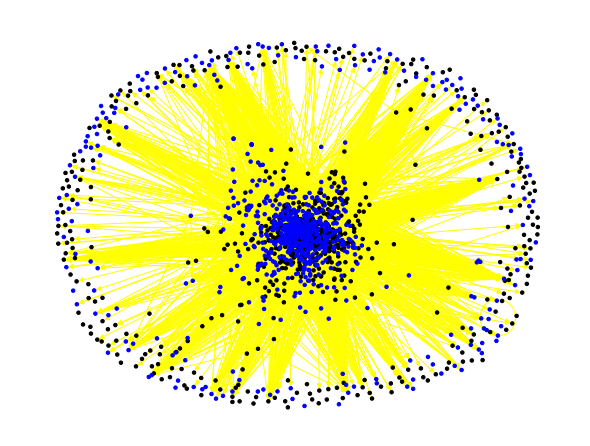

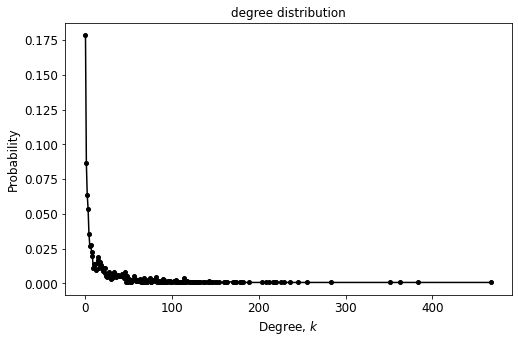

Average path length (l) :  3.385043623020582
Diameter of network (L) :  9


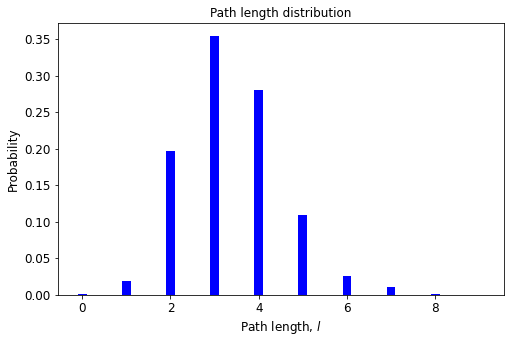

number of connected components (c):  688
Average local clustering coefficient (ccl) :  0.21841240957755392
global clustering coefficient (gcc): 0.21841240957755392


In [10]:
#NETWORKS#
#Political blog - Network no.1#
G1 = nx.read_gml('Data/Polblogs.gml')

color_map = []
color_map = ['blue' if G1.nodes[node]['value'] == 1 else 'black' for node in G1]

fig = plt.figure(figsize = (8, 6))
nx.draw(G1,
node_size = 12,
node_color=color_map,
edge_color='yellow')

degree_dist(G1,'degree distribution')
pathlen_dist(G1,'Path length distribution')
print('number of connected components (c): ', len(list(nx.strongly_connected_components(G1))))
dir_clust(G1)


Maximum degree (d):  139


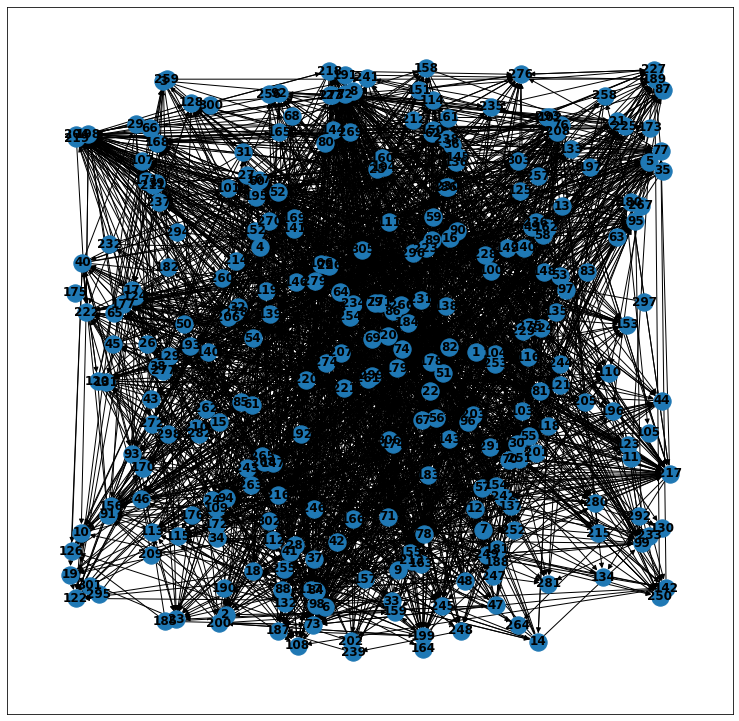

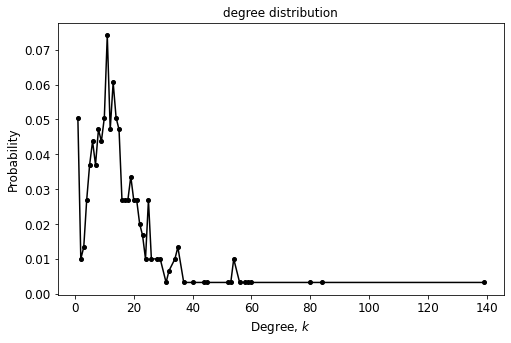

Average path length (l) :  3.974433699827792
Diameter of network (L) :  14


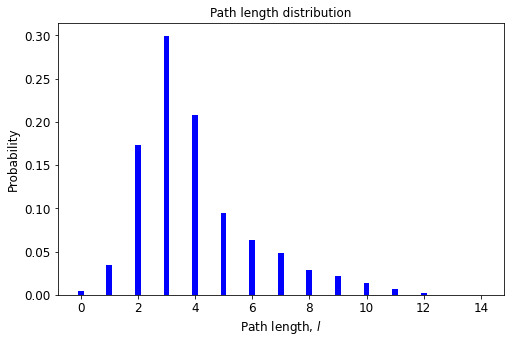

number of connected components (c):  57
Average local clustering coefficient (ccl) :  0.17355726624539414
global clustering coefficient (gcc): 0.17355726624539414


In [11]:
#Neural network - Network no.2#
G2 = nx.read_gml('Data/Neural.gml')

fig = plt.figure(figsize = (13, 13))
pos = nx.random_layout(G2,seed=120)
nx.draw_networkx(G2, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)

degree_dist_wtd(G2,'degree distribution')
pathlen_dist(G2,'Path length distribution')
print('number of connected components (c): ', len(list(nx.strongly_connected_components(G2))))
dir_clust(G2)


48436
Maximum degree (d):  2390


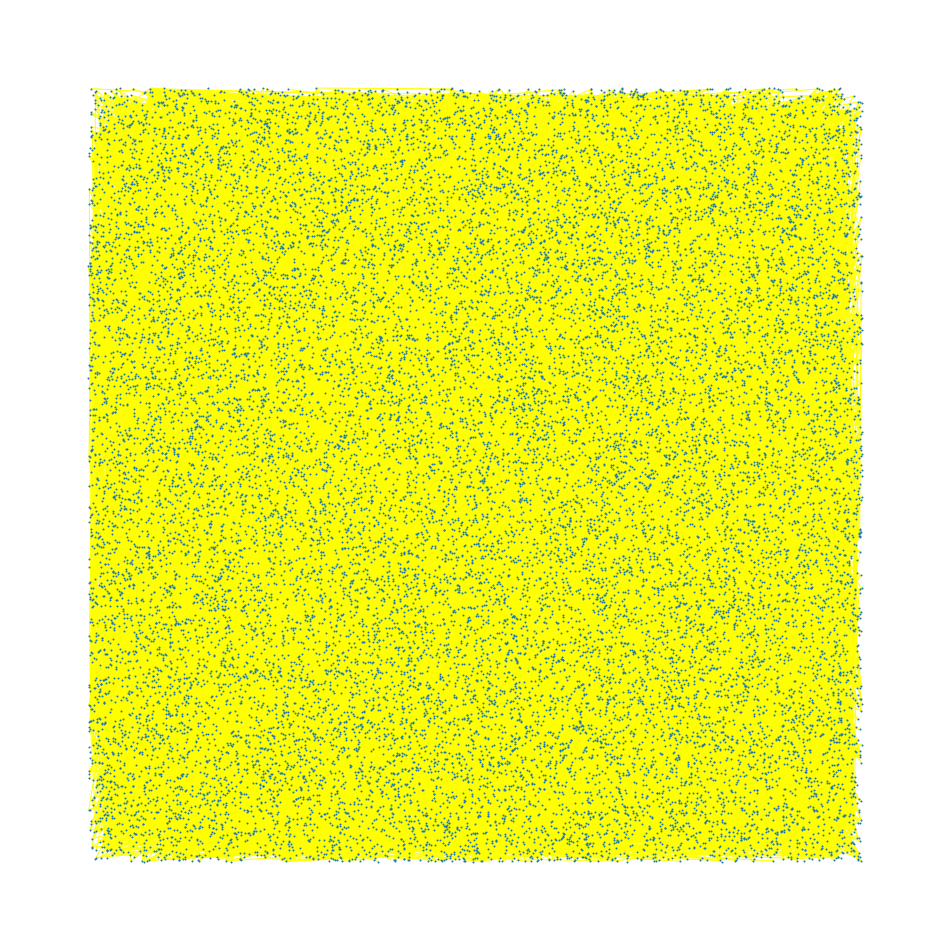

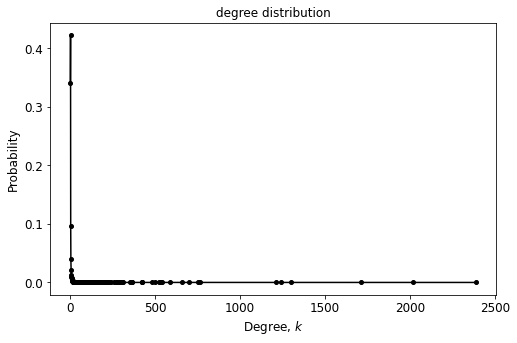

number of connected components (c):  1
global clustering coefficient (gcc): 0.2304476752355951
Average local clustering coefficient (ccl) :  0.2304476752355951


In [13]:
#Internet - Network no.3#
G3 = nx.read_gml('Data/Internet.gml')
print(len(list(G3.edges)))

fig = plt.figure(figsize = (13, 13))
nx.draw_random(G3,node_size = 1,edge_color='yellow')

degree_dist(G3,'degree distribution')
#pathlen_dist(G3,'Path length distribution')
print('number of connected components (c): ', len(list(nx.connected_components(G3))))
print('global clustering coefficient (gcc):',nx.average_clustering(G3))
avg_local_clust(G3)


Maximum degree (d):  42


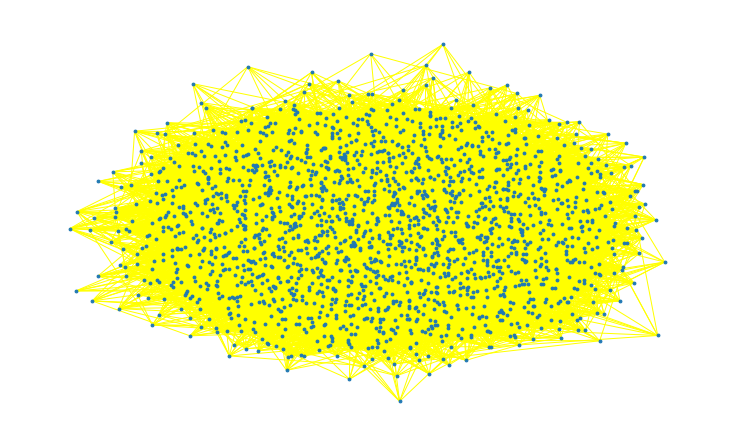

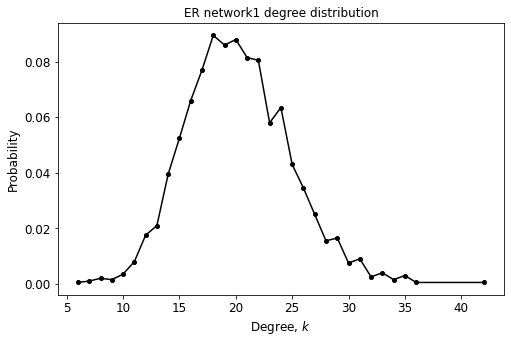

Average path length (l) :  2.8237175
Diameter of network (L) :  4


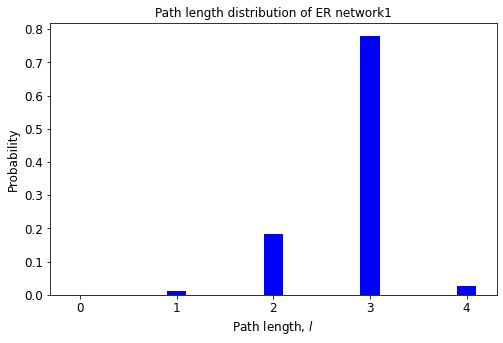

number of connected components (c):  1
global clustering coefficient (gcc): 0.010636634284119394
Average local clustering coefficient (ccl) :  0.010636634284119394


In [14]:
#ERDOS-RENYI RANDOM NETWORKS#
#Erdos-Renyi random network no.1#
G4 = nx.erdos_renyi_graph(2000,0.01)

fig = plt.figure(figsize = (10, 6))
nx.draw(G4, node_size = 8,edge_color='yellow')

degree_dist(G4,'ER network1 degree distribution')
pathlen_dist(G4,'Path length distribution of ER network1')
print('number of connected components (c): ', len(list(nx.connected_components(G4))))
print('global clustering coefficient (gcc):',nx.average_clustering(G4))
avg_local_clust(G4)


Maximum degree (d):  23


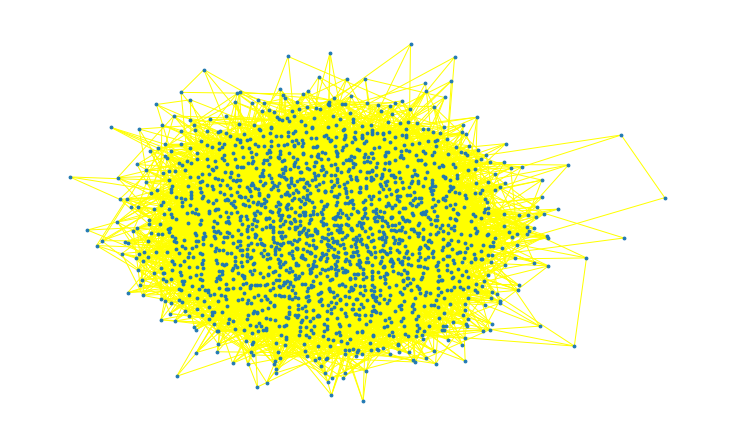

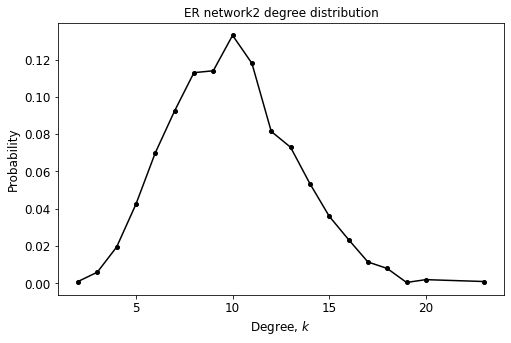

Average path length (l) :  3.5646455000000006
Diameter of network (L) :  6


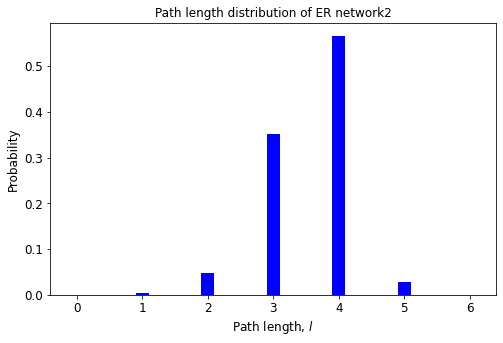

number of connected components (c):  1
global clustering coefficient (gcc): 0.004967625298453815
Average local clustering coefficient (ccl) :  0.004967625298453815


In [15]:
#Erdos-Renyi random network no.2#
G5 = nx.erdos_renyi_graph(2000,0.005)

fig = plt.figure(figsize = (10, 6))
nx.draw(G5, node_size = 8,edge_color='yellow')

degree_dist(G5,'ER network2 degree distribution')
pathlen_dist(G5,'Path length distribution of ER network2')
print('number of connected components (c): ', len(list(nx.connected_components(G5))))
print('global clustering coefficient (gcc):',nx.average_clustering(G5))
avg_local_clust(G5)


Maximum degree (d):  8


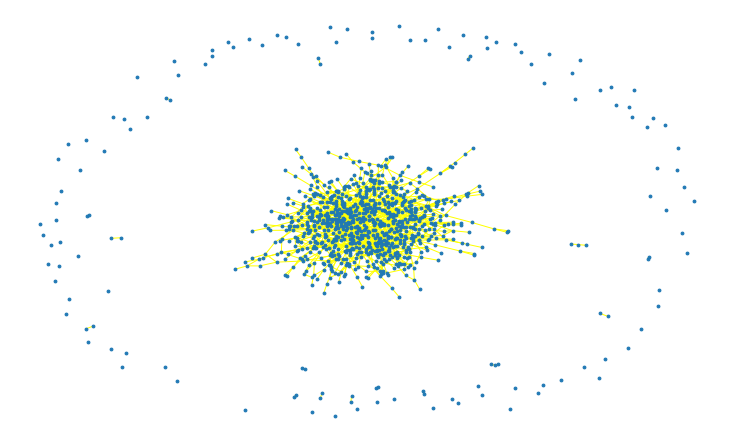

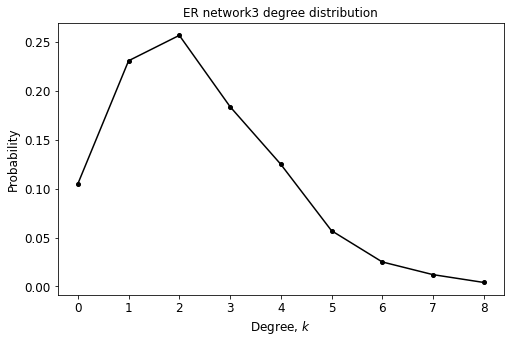

Average path length (l) :  7.413934945797157
Diameter of network (L) :  15


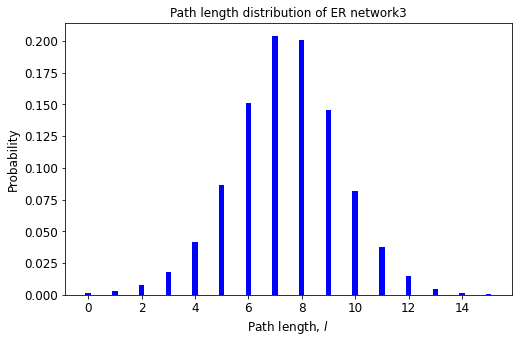

number of connected components (c):  122
global clustering coefficient (gcc): 0.001361904761904762
Average local clustering coefficient (ccl) :  0.001361904761904762


In [16]:
#Erdos-Renyi random network no.3#
G6 = nx.erdos_renyi_graph(1000,0.0025)

fig = plt.figure(figsize = (10, 6))
nx.draw(G6, node_size = 8,edge_color='yellow')

degree_dist(G6,'ER network3 degree distribution')
pathlen_dist(G6,'Path length distribution of ER network3')
print('number of connected components (c): ', len(list(nx.connected_components(G6))))
print('global clustering coefficient (gcc):',nx.average_clustering(G6))
avg_local_clust(G6)


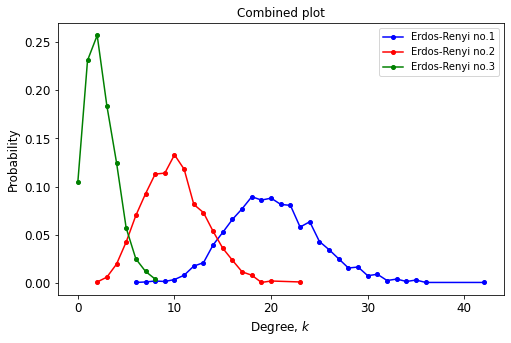

In [17]:
#COMBINED PLOT#
degree_cmbd(G4,G5,G6)